In [1]:
#!pip install efficient-apriori

In [2]:
from efficient_apriori import apriori
import pandas as pd
import numpy as np

In [3]:
groceries=pd.read_csv('groceriesDataset4.csv')
bakery=pd.read_csv('1000-out2.csv')

In [4]:
groceries

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
groceries=groceries.drop(['Item(s)'],axis=1)
groceries

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
f=lambda record:[x for x in record if x is not np.nan]
transactions=list(map(f, groceries.values))
transactions[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [7]:
itemsets, rules=apriori(transactions, min_support=0.055, min_confidence=0.035)

In [8]:
itemsets

{1: {('citrus fruit',): 814,
  ('margarine',): 576,
  ('tropical fruit',): 1032,
  ('yogurt',): 1372,
  ('coffee',): 571,
  ('whole milk',): 2513,
  ('pip fruit',): 744,
  ('other vegetables',): 1903,
  ('butter',): 545,
  ('rolls/buns',): 1809,
  ('bottled beer',): 792,
  ('bottled water',): 1087,
  ('frankfurter',): 580,
  ('soda',): 1715,
  ('fruit/vegetable juice',): 711,
  ('newspapers',): 785,
  ('pastry',): 875,
  ('root vegetables',): 1072,
  ('canned beer',): 764,
  ('sausage',): 924,
  ('brown bread',): 638,
  ('shopping bags',): 969,
  ('pork',): 567,
  ('whipped/sour cream',): 705,
  ('domestic eggs',): 624},
 2: {('other vegetables', 'whole milk'): 736,
  ('rolls/buns', 'whole milk'): 557,
  ('whole milk', 'yogurt'): 551}}

In [9]:
rules

[{whole milk} -> {other vegetables},
 {other vegetables} -> {whole milk},
 {whole milk} -> {rolls/buns},
 {rolls/buns} -> {whole milk},
 {yogurt} -> {whole milk},
 {whole milk} -> {yogurt}]

In [10]:
frequent_itemsets=[]
for size, itemset in itemsets.items():
    for items, support in itemset.items():
        frequent_itemsets.append((items, support))

In [11]:
frequent_itemsets

[(('citrus fruit',), 814),
 (('margarine',), 576),
 (('tropical fruit',), 1032),
 (('yogurt',), 1372),
 (('coffee',), 571),
 (('whole milk',), 2513),
 (('pip fruit',), 744),
 (('other vegetables',), 1903),
 (('butter',), 545),
 (('rolls/buns',), 1809),
 (('bottled beer',), 792),
 (('bottled water',), 1087),
 (('frankfurter',), 580),
 (('soda',), 1715),
 (('fruit/vegetable juice',), 711),
 (('newspapers',), 785),
 (('pastry',), 875),
 (('root vegetables',), 1072),
 (('canned beer',), 764),
 (('sausage',), 924),
 (('brown bread',), 638),
 (('shopping bags',), 969),
 (('pork',), 567),
 (('whipped/sour cream',), 705),
 (('domestic eggs',), 624),
 (('other vegetables', 'whole milk'), 736),
 (('rolls/buns', 'whole milk'), 557),
 (('whole milk', 'yogurt'), 551)]

In [12]:
sorted_itemsets=sorted(frequent_itemsets, key=lambda x:x[1], reverse=True)

In [13]:
for items, support in sorted_itemsets:
    print(f"Items:{','.join(items)}-Support:{support}")

Items:whole milk-Support:2513
Items:other vegetables-Support:1903
Items:rolls/buns-Support:1809
Items:soda-Support:1715
Items:yogurt-Support:1372
Items:bottled water-Support:1087
Items:root vegetables-Support:1072
Items:tropical fruit-Support:1032
Items:shopping bags-Support:969
Items:sausage-Support:924
Items:pastry-Support:875
Items:citrus fruit-Support:814
Items:bottled beer-Support:792
Items:newspapers-Support:785
Items:canned beer-Support:764
Items:pip fruit-Support:744
Items:other vegetables,whole milk-Support:736
Items:fruit/vegetable juice-Support:711
Items:whipped/sour cream-Support:705
Items:brown bread-Support:638
Items:domestic eggs-Support:624
Items:frankfurter-Support:580
Items:margarine-Support:576
Items:coffee-Support:571
Items:pork-Support:567
Items:rolls/buns,whole milk-Support:557
Items:whole milk,yogurt-Support:551
Items:butter-Support:545


In [14]:
top5=sorted_itemsets[:5]
top5

[(('whole milk',), 2513),
 (('other vegetables',), 1903),
 (('rolls/buns',), 1809),
 (('soda',), 1715),
 (('yogurt',), 1372)]

In [15]:
import matplotlib.pyplot as plt

In [16]:
item_names=[','.join(items) for items, _ in top5]
support_values=[support for _, support in top5]

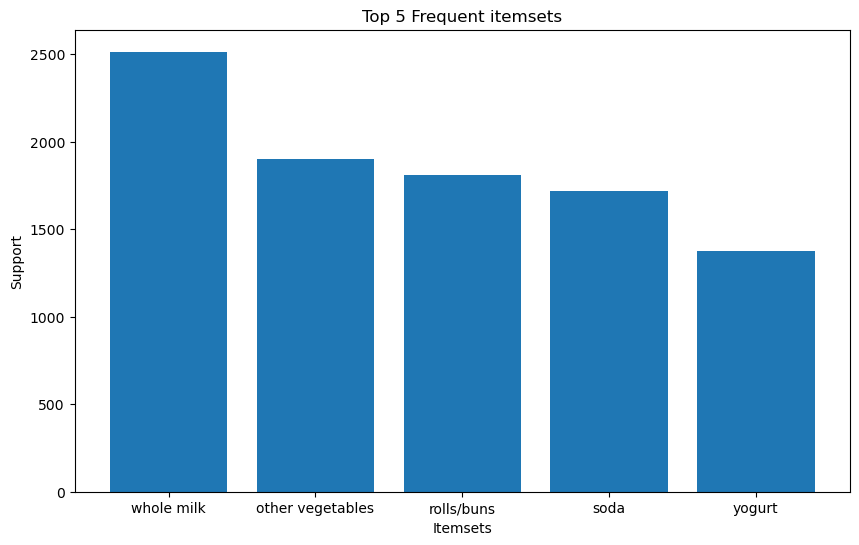

In [17]:
plt.figure(figsize=(10,6))
plt.bar(item_names,support_values)
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Top 5 Frequent itemsets')
plt.show()

In [18]:
bakery=pd.read_csv('1000i.csv')

In [19]:
bakery

,1,3,7
0,1,4,15
1,1,2,49
2,1,5,44
3,2,1,1
4,2,2,19
...,...,...,...
3532,999,5,35
3533,999,2,3
3534,1000,4,15
3535,1000,3,47


In [20]:
f=lambda record:[x for x in record if x is not np.nan]
transactions=list(map(f, bakery.values))
transactions[:5]

[[1, 4, 15], [1, 2, 49], [1, 5, 44], [2, 1, 1], [2, 2, 19]]

In [21]:
itemsets, rules=apriori(transactions, min_support=0.011, min_confidence=0.010)
itemsets

{1: {(1,): 787,
  (4,): 851,
  (15,): 76,
  (2,): 748,
  (49,): 61,
  (5,): 745,
  (44,): 80,
  (19,): 80,
  (3,): 766,
  (18,): 87,
  (35,): 79,
  (9,): 92,
  (23,): 84,
  (7,): 98,
  (14,): 98,
  (21,): 48,
  (12,): 82,
  (31,): 92,
  (36,): 86,
  (48,): 80,
  (8,): 40,
  (28,): 104,
  (27,): 95,
  (10,): 44,
  (11,): 73,
  (24,): 69,
  (40,): 71,
  (41,): 75,
  (43,): 65,
  (20,): 44,
  (13,): 57,
  (26,): 50,
  (22,): 111,
  (39,): 62,
  (16,): 83,
  (32,): 80,
  (45,): 98,
  (17,): 57,
  (37,): 69,
  (47,): 75,
  (34,): 47,
  (25,): 41,
  (29,): 64,
  (0,): 84,
  (42,): 84,
  (30,): 51,
  (33,): 80,
  (46,): 88},
 2: {(1, 2): 40, (1, 4): 40, (2, 4): 39, (3, 4): 39, (4, 5): 40}}

In [22]:
rules

[{2} -> {1},
 {1} -> {2},
 {4} -> {1},
 {1} -> {4},
 {4} -> {2},
 {2} -> {4},
 {4} -> {3},
 {3} -> {4},
 {5} -> {4},
 {4} -> {5}]

In [23]:
frequent_itemsets=[]
for size, itemset in itemsets.items():
    for items, support in itemset.items():
        frequent_itemsets.append((items, support))

In [24]:
frequent_itemsets

[((1,), 787),
 ((4,), 851),
 ((15,), 76),
 ((2,), 748),
 ((49,), 61),
 ((5,), 745),
 ((44,), 80),
 ((19,), 80),
 ((3,), 766),
 ((18,), 87),
 ((35,), 79),
 ((9,), 92),
 ((23,), 84),
 ((7,), 98),
 ((14,), 98),
 ((21,), 48),
 ((12,), 82),
 ((31,), 92),
 ((36,), 86),
 ((48,), 80),
 ((8,), 40),
 ((28,), 104),
 ((27,), 95),
 ((10,), 44),
 ((11,), 73),
 ((24,), 69),
 ((40,), 71),
 ((41,), 75),
 ((43,), 65),
 ((20,), 44),
 ((13,), 57),
 ((26,), 50),
 ((22,), 111),
 ((39,), 62),
 ((16,), 83),
 ((32,), 80),
 ((45,), 98),
 ((17,), 57),
 ((37,), 69),
 ((47,), 75),
 ((34,), 47),
 ((25,), 41),
 ((29,), 64),
 ((0,), 84),
 ((42,), 84),
 ((30,), 51),
 ((33,), 80),
 ((46,), 88),
 ((1, 2), 40),
 ((1, 4), 40),
 ((2, 4), 39),
 ((3, 4), 39),
 ((4, 5), 40)]

In [25]:
sorted_itemsets=sorted(frequent_itemsets, key=lambda x:x[1], reverse=True)

In [26]:
top5=sorted_itemsets[:5]
top5

[((4,), 851), ((1,), 787), ((3,), 766), ((2,), 748), ((5,), 745)]